# Creazione screener evoluto su singolo asset

Architettura di un Hammer e di una Shooting Star senza conferma.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ffn
import datetime

ticker = "AAPL"
startdate = "2007-01-01"
enddate = "2020-11-10"

In [5]:
input_string = ticker + ":Open," + ticker + ":High," + \
               ticker + ":Low," + ticker + ":Close," + ticker + ":Volume"
input_string

'AAPL:Open,AAPL:High,AAPL:Low,AAPL:Close,AAPL:Volume'

In [6]:
dataset =  ffn.get(input_string, start = startdate, end = enddate).apply(lambda x: round(x,2))
dataset.head(10)

,aaplopen,aaplhigh,aapllow,aaplclose,aaplvolume
Date,,,,,
2007-01-03,3.08,3.09,2.92,2.99,1.238320e+09
2007-01-04,3.00,3.07,2.99,3.06,8.472604e+08
2007-01-05,3.06,3.08,3.01,3.04,8.347416e+08
2007-01-08,3.07,3.09,3.05,3.05,7.971068e+08
2007-01-09,3.09,3.32,3.04,3.31,3.349298e+09
2007-01-10,3.38,3.49,3.34,3.46,2.952880e+09
2007-01-11,3.43,3.46,3.40,3.42,1.440253e+09
2007-01-12,3.38,3.39,3.33,3.38,1.312690e+09
2007-01-16,3.42,3.47,3.41,3.47,1.244076e+09


In [7]:
dataset.columns = ["open","high","low","close","volume"]
dataset.tail(10)

,open,high,low,close,volume
Date,,,,,
2020-10-28,115.05,115.43,111.10,111.20,143937800.0
2020-10-29,112.37,116.93,112.20,115.32,146129200.0
2020-10-30,111.06,111.99,107.72,108.86,190272600.0
2020-11-02,109.11,110.68,107.32,108.77,122866900.0
2020-11-03,109.66,111.49,108.73,110.44,107624400.0
2020-11-04,114.14,115.59,112.35,114.95,138235500.0
2020-11-05,117.95,119.62,116.87,119.03,126387100.0
2020-11-06,118.32,119.20,116.13,118.69,114457900.0
2020-11-09,120.50,121.99,116.05,116.32,154515300.0


In [8]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
#%matplotlib inline

graph_title = ticker + " from " + str(dataset.index[0]) + " to " \
                                + str(dataset.index[-1]) + " - Powered by Gandalf Project R&D"
dataset.tail(100).iplot(kind = 'candle', theme = 'white',
                        up_color = 'green', down_color = 'red',
                        title = graph_title, xTitle = "Time", yTitle = "Prices")

In [9]:
dataset["range_perc"] = (dataset.high - dataset.low) / dataset.low * 100
dataset["open_pos"] = (dataset.open - dataset.low) / (dataset.high - dataset.low) * 100
dataset["close_pos"] = (dataset.close - dataset.low) / (dataset.high - dataset.low) * 100
dataset["SMA20"] = dataset.close.rolling(20).mean()
dataset["STD20"] = dataset.close.rolling(20).std()
dataset["BBU"] = dataset.SMA20 + 2 * dataset.STD20
dataset["BBL"] = dataset.SMA20 - 2 * dataset.STD20
dataset.dropna(inplace = True)
dataset.head(10)

,open,high,low,close,volume,range_perc,open_pos,close_pos,SMA20,STD20,BBU,BBL
Date,,,,,,,,,,,,
2007-01-31,3.03,3.07,3.01,3.06,8.560692e+08,1.993355,33.333333,83.333333,3.1745,0.162690,3.499881,2.849119
2007-02-01,3.08,3.08,3.03,3.03,6.643420e+08,1.650165,100.000000,0.000000,3.1765,0.160534,3.497569,2.855431
2007-02-02,3.00,3.04,2.99,3.03,6.215300e+08,1.672241,20.000000,80.000000,3.1750,0.161815,3.498631,2.851369
2007-02-05,3.01,3.04,3.00,3.00,5.788524e+08,1.333333,25.000000,0.000000,3.1730,0.163807,3.500613,2.845387
2007-02-06,3.02,3.02,2.96,3.01,8.643936e+08,2.027027,100.000000,83.333333,3.1710,0.165622,3.502243,2.839757
2007-02-07,3.02,3.09,2.98,3.08,1.066825e+09,3.691275,36.363636,90.909091,3.1595,0.163433,3.486365,2.832635
2007-02-08,3.05,3.09,3.05,3.08,6.790308e+08,1.311475,0.000000,75.000000,3.1405,0.148021,3.436542,2.844458
2007-02-09,3.07,3.08,2.97,2.97,8.605408e+08,3.703704,90.909091,0.000000,3.1180,0.137098,3.392195,2.843805
2007-02-12,3.02,3.04,2.99,3.03,7.240716e+08,1.672241,60.000000,80.000000,3.1005,0.123564,3.347629,2.853371


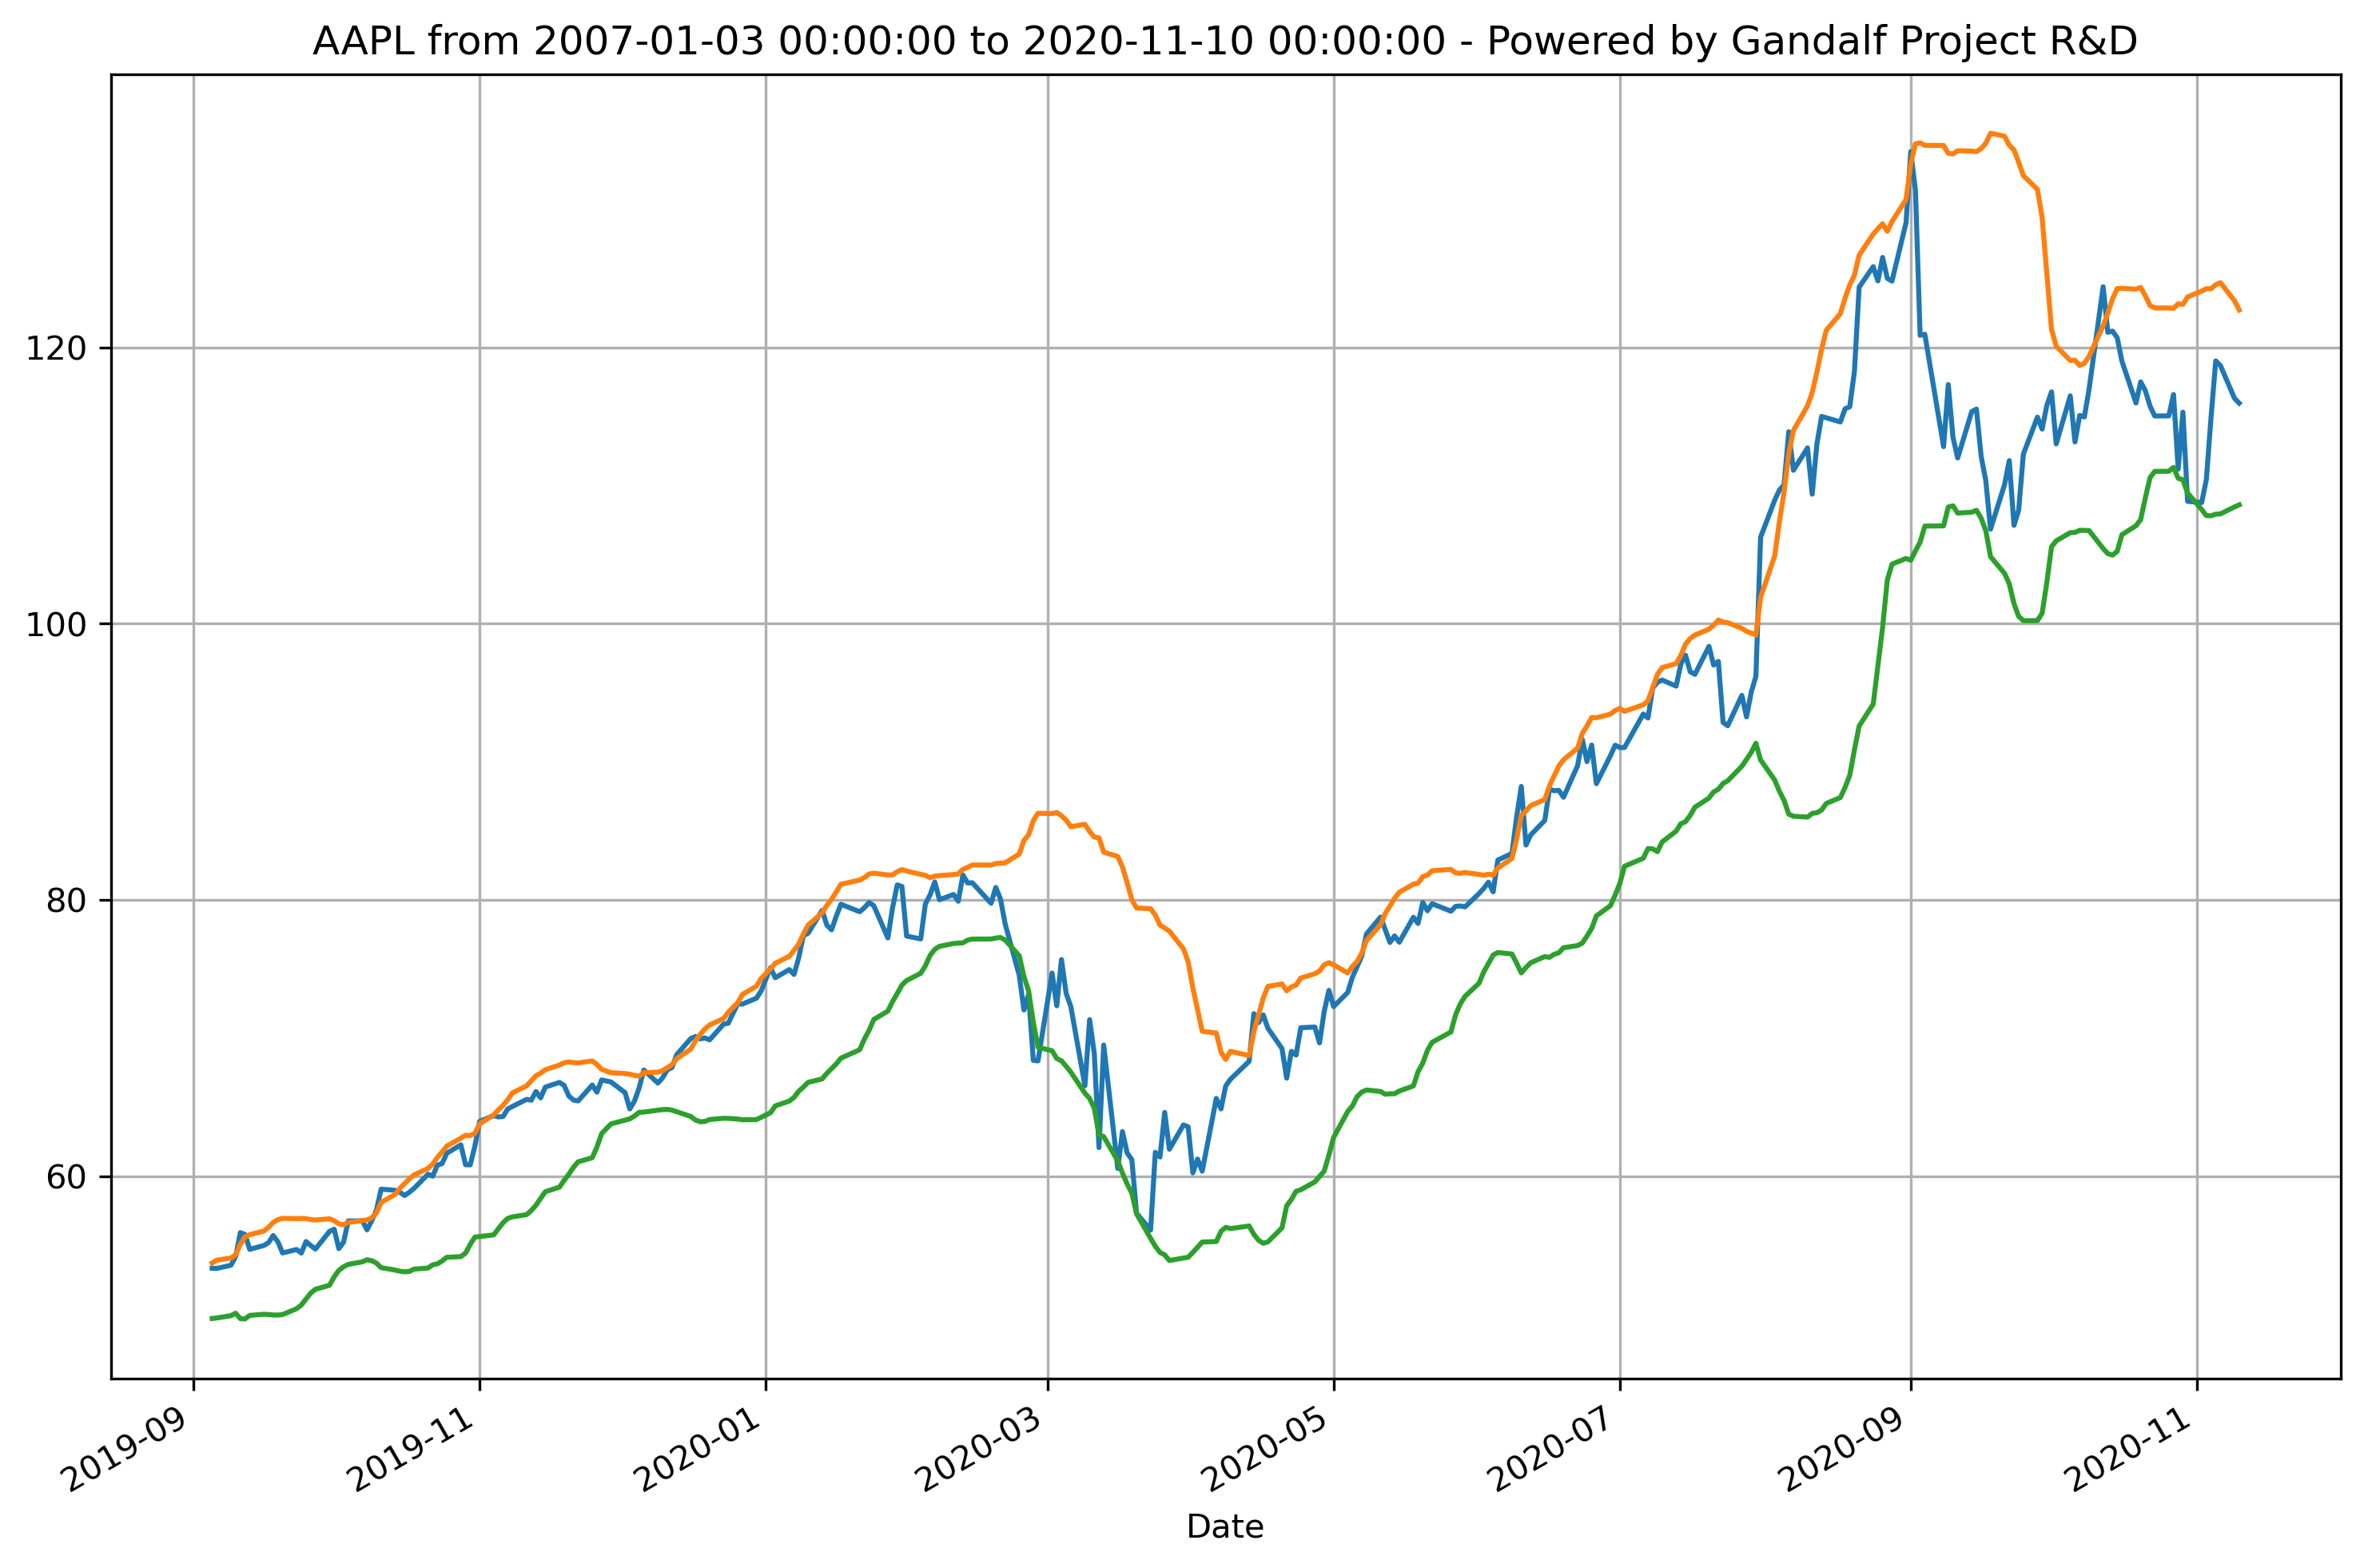

In [11]:
plt.figure(figsize = [12,8], dpi = 300)
plt.title(graph_title)
dataset.close[-300:].plot()
dataset.BBU[-300:].plot()
dataset.BBL[-300:].plot().grid()

# <span style="color:green">Esempio pattern "Hammer"</span>

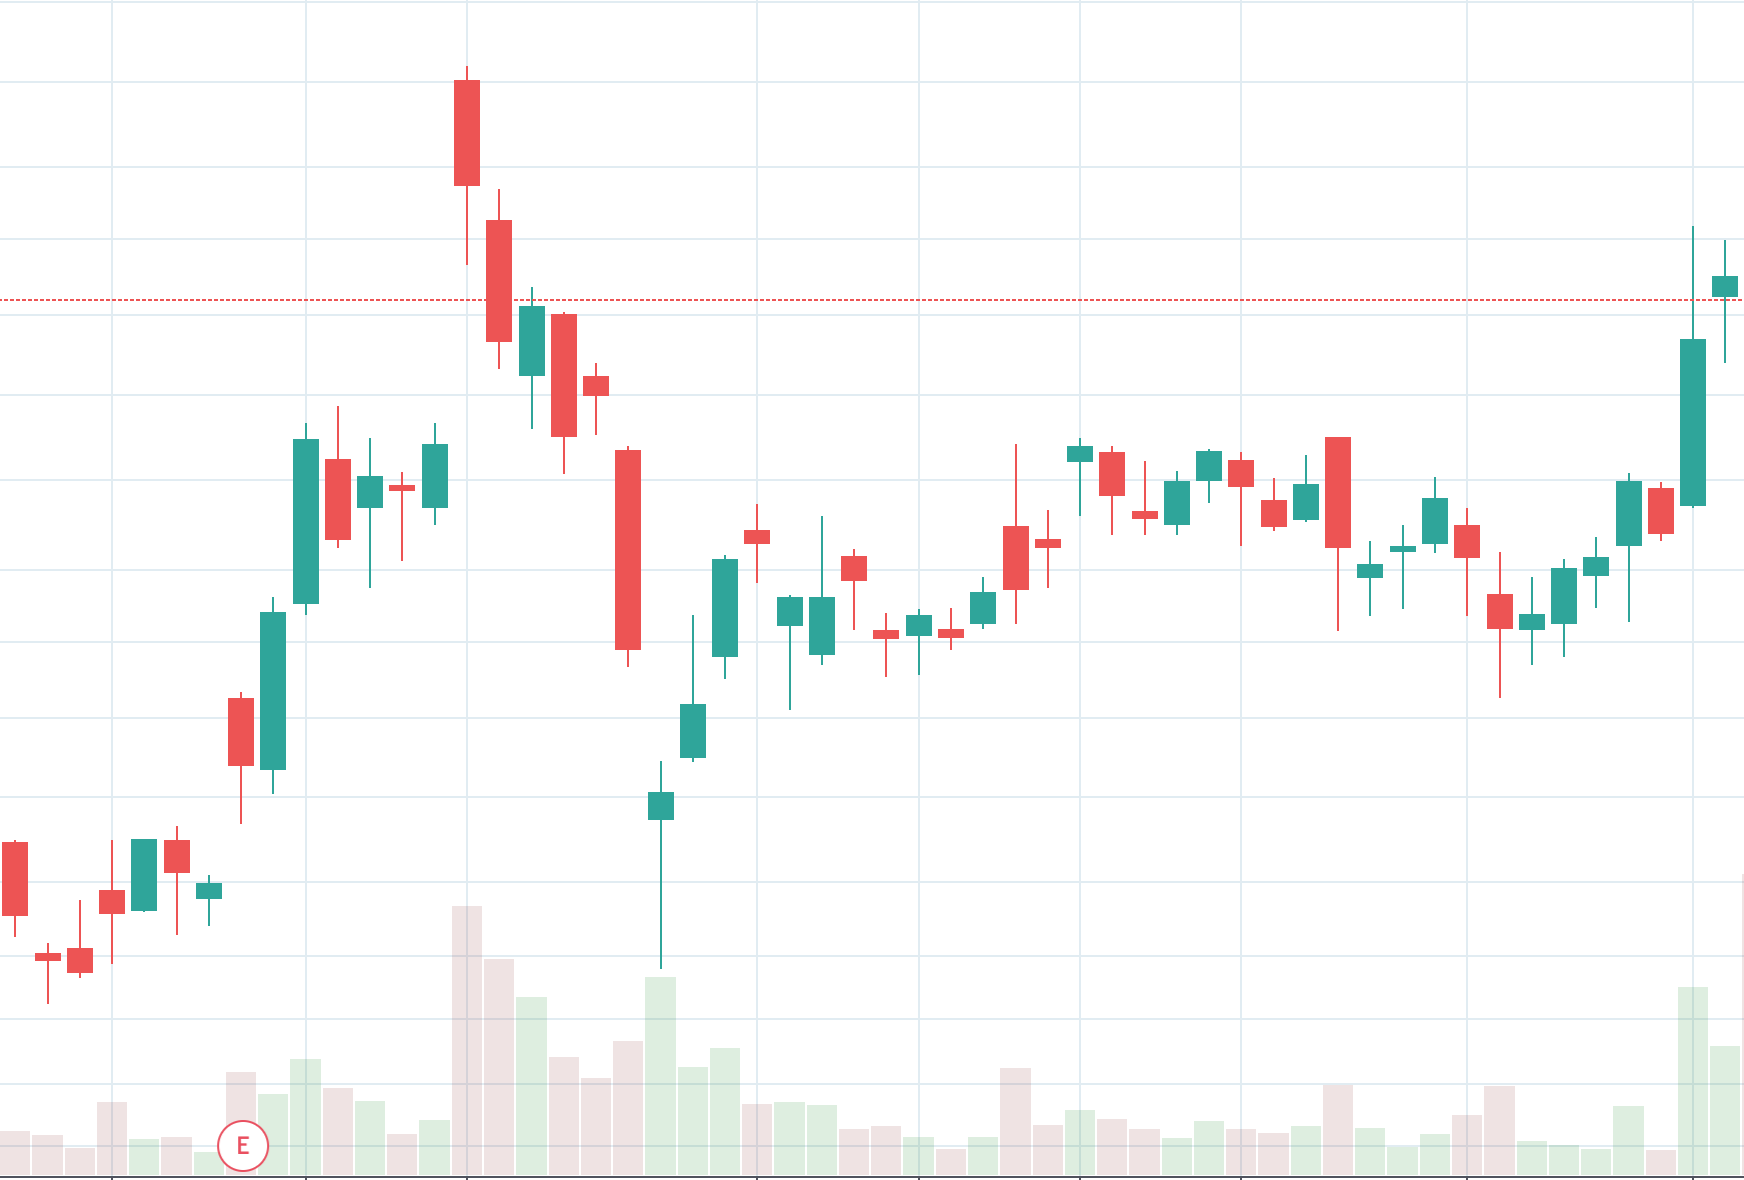

In [12]:
pattern = (dataset.low < dataset.BBL) & (dataset.close > dataset.BBL) & \
          (dataset.close_pos > 70) & (dataset.open_pos > 70) & (dataset.range_perc > 1)

Occurrences: 13 

DatetimeIndex(['2007-08-01', '2008-07-21', '2010-05-06', '2010-08-27',
               '2012-10-09', '2012-11-16', '2015-07-07', '2015-10-01',
               '2015-12-16', '2015-12-21', '2018-02-09', '2019-05-10',
               '2020-03-23'],
              dtype='datetime64[ns]', name='Date', freq=None) 

After: 1 days: 3.68 average of 0.28 with 7 winning trades and 6 loosing trades
After: 2 days: 3.59 average of 0.28 with 9 winning trades and 4 loosing trades
After: 3 days: 9.56 average of 0.74 with 9 winning trades and 4 loosing trades
After: 4 days: 9.12 average of 0.7 with 9 winning trades and 4 loosing trades
After: 5 days: 11.93 average of 0.92 with 11 winning trades and 2 loosing trades
After: 6 days: 9.9 average of 0.76 with 9 winning trades and 4 loosing trades
After: 7 days: 6.48 average of 0.5 with 8 winning trades and 5 loosing trades
After: 8 days: 7.12 average of 0.55 with 8 winning trades and 5 loosing trades
After: 9 days: 5.8 average of 0.45 with 8 wi

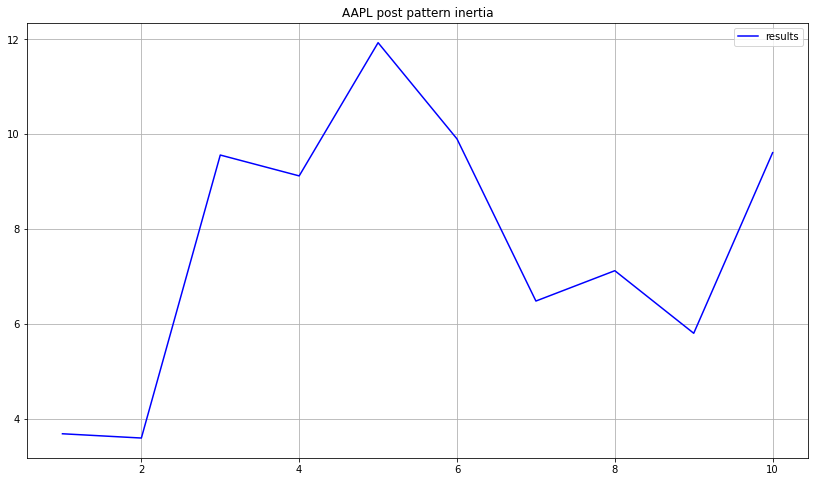

In [13]:
def pattern_stats(dataframe, pattern, direction, delay, ticker):
    """
    Function to calculate pattern stats
    """
    service = dataframe.copy()
    dates = service[pattern == True].index
    occurrences = service[pattern == True].count()[0]
    print("Occurrences:", occurrences, "\n")
    print(dates,"\n")
    results = []
    for i in range(0, delay):
        label = "st" + str(i)
        if direction == "long":
            service[label] = np.where(pattern.shift(1) == True, service.close.shift(-i) - service.open, np.nan)
        else:
            service[label] = np.where(pattern.shift(1) == True, -service.close.shift(-i) + service.open, np.nan)
        profit = round(service[label].sum(),2)
        avg_profit = round(profit / occurrences, 2)
        winning_trades = service[service[label] > 0].count()[0]
        loosing_trades = service[service[label] <= 0].count()[0]
        print("After:", i + 1,  "days:", profit, "average of", avg_profit, "with", winning_trades, "winning trades and", loosing_trades, "loosing trades")
        results.append(profit)
    plotting_results = pd.DataFrame(results, columns = ["results"], 
                                    index = range(1, delay + 1))
    plotting_results.plot(figsize = [14,8], color = "blue").grid()
    plt.title(ticker + " post pattern inertia")
    plt.show()
    return dates, plotting_results

results = pattern_stats(dataset, pattern, "long", 10, ticker)

In [14]:
def plot_patterns(dataframe, results):
    """
    Function that plots every single pattern occurrence
    """
    for date in results:
        single_case = dataframe[(dataframe.index >= (date)) & \
                                (dataframe.index <= (date + pd.Timedelta(days = 20)))]    
        graph_title = ticker + " from " + str(single_case.index[0]) + " - Powered by Gandalf Project R&D"

        single_case.iplot(kind = 'candle', theme = 'white',
                          up_color = "green", down_color = "red",
                          title = graph_title, xTitle = "Time", yTitle = "Prices")
    return

plot_patterns(dataset, results[0])

# <span style="color:red">Esempio "Shooting Star"</span>

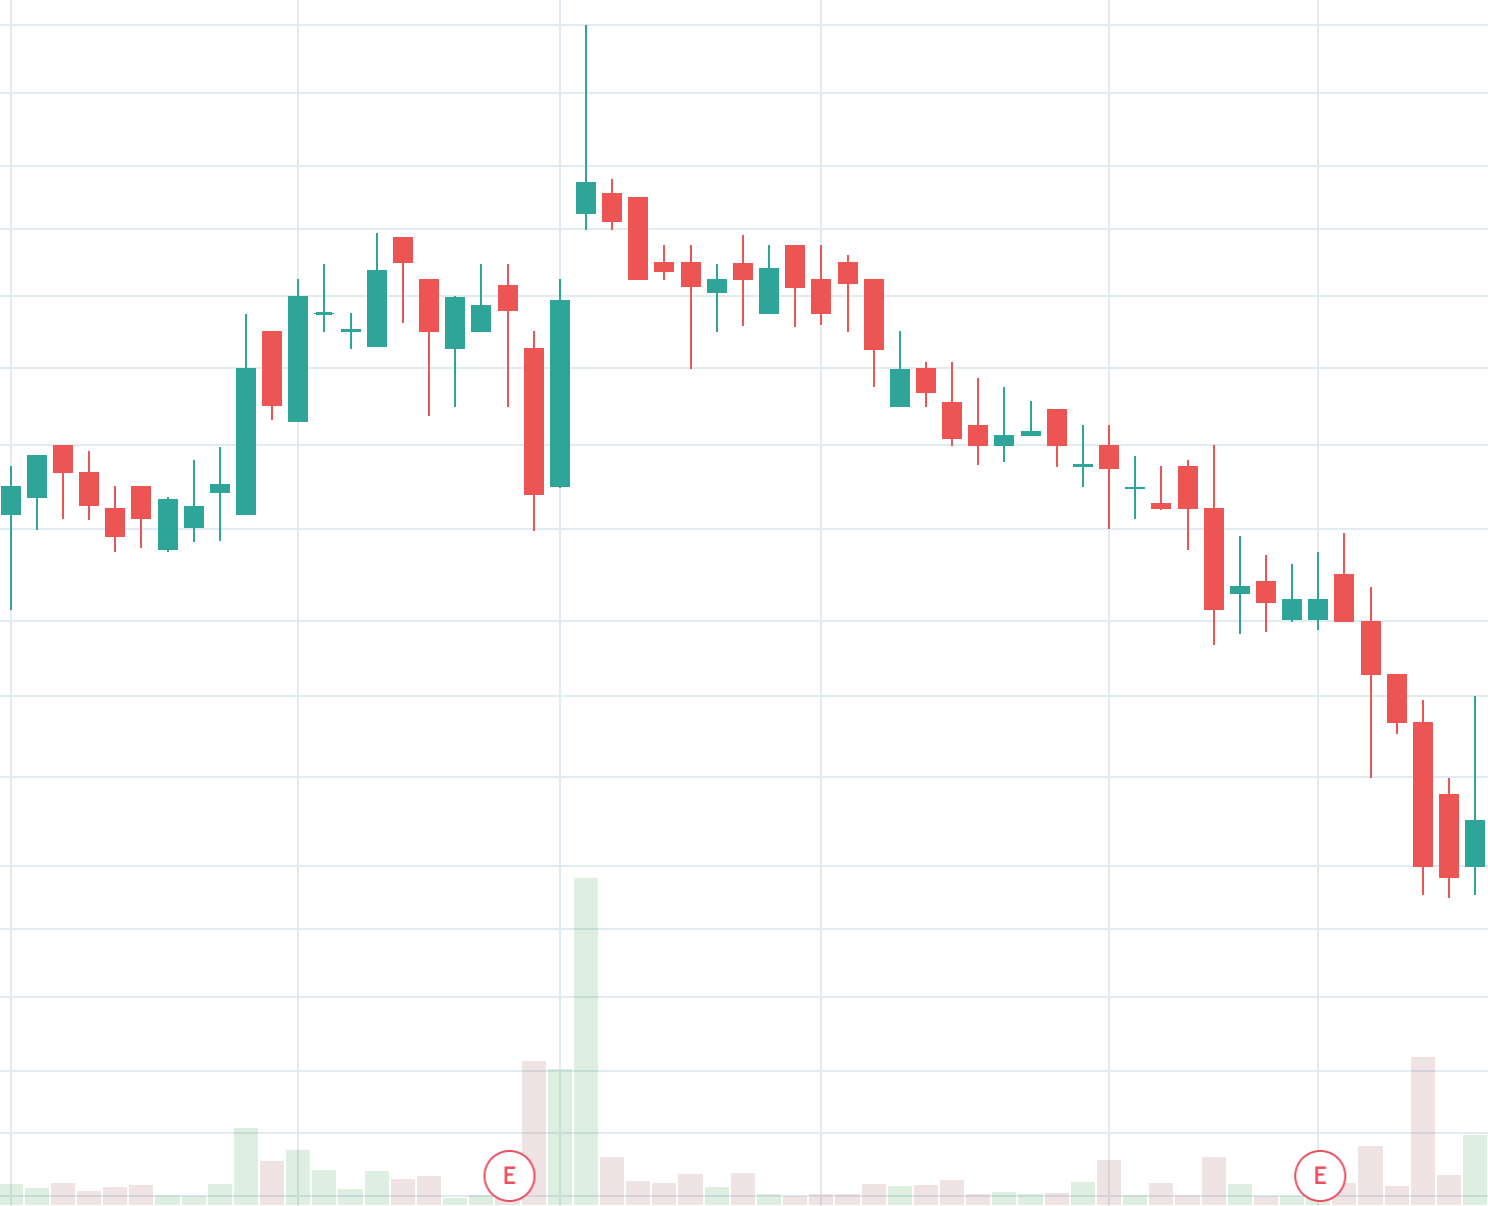

In [15]:
pattern = (dataset.high > dataset.BBU) & (dataset.close < dataset.BBU) & \
          (dataset.close_pos < 30) & (dataset.open_pos < 30) & (dataset.range_perc > 1)

Occurrences: 15 

DatetimeIndex(['2007-02-23', '2007-04-30', '2007-12-27', '2008-04-07',
               '2009-03-24', '2009-08-25', '2009-09-23', '2014-11-17',
               '2015-10-21', '2016-02-29', '2018-05-07', '2019-04-09',
               '2019-06-10', '2019-10-01', '2019-10-07'],
              dtype='datetime64[ns]', name='Date', freq=None) 

After: 1 days: -0.43 average of -0.03 with 10 winning trades and 5 loosing trades
After: 2 days: -1.97 average of -0.13 with 6 winning trades and 9 loosing trades
After: 3 days: -4.64 average of -0.31 with 5 winning trades and 10 loosing trades
After: 4 days: -5.45 average of -0.36 with 7 winning trades and 8 loosing trades
After: 5 days: -5.77 average of -0.38 with 7 winning trades and 8 loosing trades
After: 6 days: -7.78 average of -0.52 with 5 winning trades and 10 loosing trades
After: 7 days: -9.35 average of -0.62 with 4 winning trades and 11 loosing trades
After: 8 days: -12.38 average of -0.83 with 3 winning trades and 12 loosing 

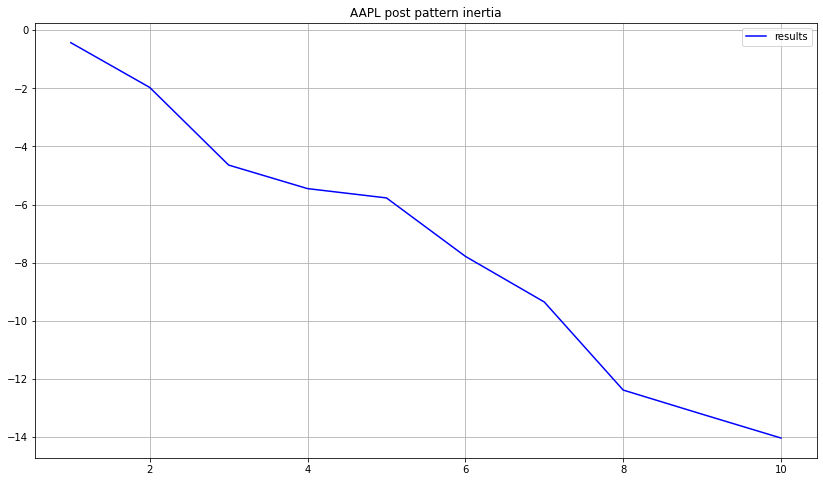

In [16]:
results = pattern_stats(dataset, pattern, "short", 10, ticker)

In [17]:
plot_patterns(dataset,results[0])